In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt

import cv2
import numpy as np

C:\Users\parit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\parit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\parit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\parit\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passi

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets\
.fashion_mnist.load_data()

class_names = ['T-shirt', 'trousers', 'pullover', 'dress', 'coat',
               'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

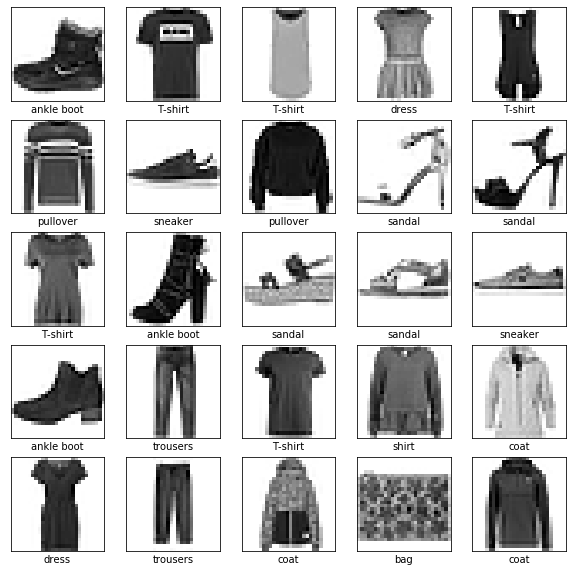

In [3]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [4]:

train_images = train_images.reshape(train_images.shape[0], 28, 28, 1)
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1)

In [5]:
model = tf.keras.models.Sequential([
  
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
        ])

In [6]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", 
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print("Test accuracy: ", test_acc)
model.save("model.h5")

Epoch 1/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.9118 - accuracy: 0.8482
Epoch 2/10
60000/60000 [==============================] - 15s 245us/sample - loss: 0.2885 - accuracy: 0.8960
Epoch 3/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.2511 - accuracy: 0.9083
Epoch 4/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.2360 - accuracy: 0.9138
Epoch 5/10
60000/60000 [==============================] - 15s 246us/sample - loss: 0.2159 - accuracy: 0.9210
Epoch 6/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.1961 - accuracy: 0.9274
Epoch 7/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.1812 - accuracy: 0.9328
Epoch 8/10
60000/60000 [==============================] - 14s 241us/sample - loss: 0.1644 - accuracy: 0.9396
Epoch 9/10
60000/60000 [==============================] - 14s 240us/sample - loss: 0.1528 - accuracy: 0.9432
Epoch 10/10
60000/6

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


In [9]:
def get_image(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    return cv2.resize(img, (28,28))


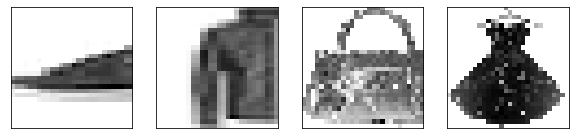

In [10]:
images = np.array([get_image("C://Users//parit//OneDrive//Desktop//sneaker.png"), get_image("C://Users//parit//OneDrive//Desktop//ss.png"), get_image("C://Users//parit//OneDrive//Desktop//bag2.png"),get_image("C://Users//parit//OneDrive//Desktop//dress.png")])
plt.figure(figsize=(10,10))
for i in range(4):
    plt.subplot(1,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(images[i], cmap=plt.cm.binary)
plt.show()
images_reshaped = images.reshape(images.shape[0], 28, 28,1)
images_reshaped = tf.cast(images_reshaped, tf.float32)


In [11]:
model = tf.keras.models.load_model("model.h5")
preds = model.predict(images_reshaped)

def plot_image(prediction, img):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(prediction)
    plt.xlabel("{} {:2.0f}%".format(class_names[predicted_label],
               100*np.max(prediction),
               ),
                color="blue")

In [12]:
def plot_value_array(prediction):
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction, color="#888888")
    plt.ylim([0,1])
    predicted_label = np.argmax(prediction)
    thisplot[predicted_label].set_color('blue')

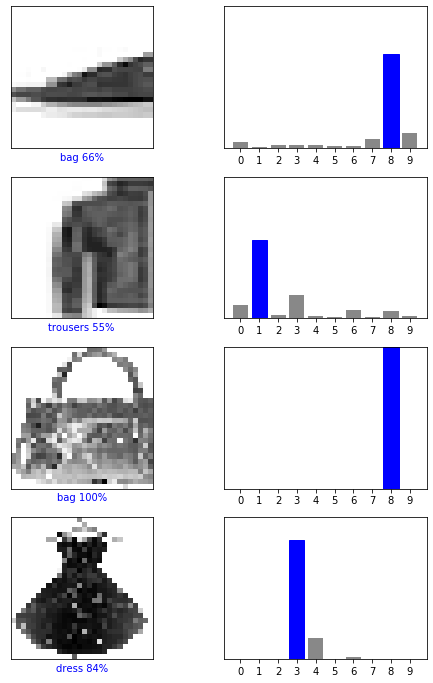

In [13]:
plt.figure(figsize=(8,12))
for i in range(4):
    # image
    plt.subplot(4, 2, 2*i+1)
    plot_image(preds[i], images[i])
    # bar chart
    plt.subplot(4, 2, 2*i+2)
    plot_value_array(preds[i])
plt.show()  